In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import yfinance as yf

In [2]:
# Daten herunterladen und DataFrame erstellen
df = yf.download('TSLA', start='2015-01-01', end='2020-07-01')

# Index zurücksetzen und "Date" als separate Spalte erstellen
df.reset_index(inplace=True)

# Spalte "Date" umbenennen
df.rename(columns={'index': 'Date'}, inplace=True)

# Überprüfen Sie das aktualisierte DataFrame
print(df.head())

[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close    Volume
0 2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
1 2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2 2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
3 2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
4 2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500


In [3]:
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1383, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [4]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [5]:
sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [6]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 11s 81ms/step - loss: 0.0452
Epoch 2/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0135
Epoch 3/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0100
Epoch 4/100
24/24 [==============================] - 2s 80ms/step - loss: 0.0104
Epoch 5/100
24/24 [==============================] - 2s 83ms/step - loss: 0.0098
Epoch 6/100
24/24 [==============================] - 2s 82ms/step - loss: 0.0087
Epoch 7/100
24/24 [==============================] - 2s 81ms/step - loss: 0.0085
Epoch 8/100
24/24 [==============================] - 2s 81ms/step - loss: 0.0081
Epoch 9/100
24/24 [==============================] - 2s 86ms/step - loss: 0.0083
Epoch 10/100
24/24 [==============================] - 2s 85ms/step - loss: 0.0081
Epoch 11/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0080
Epoch 12/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0082
Epoch 13/100
24/24 [====

In [7]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)

inputs = sc.transform(inputs)

X_test = []

for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)


(459, 60, 1)


In [8]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 [==============================] - 2s 20ms/step


In [19]:
predicted_stock_price

array([22.436987 , 22.502184 , 22.497274 , 22.49875  , 22.514675 ,
       22.672726 , 22.734343 , 22.577652 , 22.241678 , 21.896845 ,
       21.594864 , 21.4598   , 21.423773 , 21.368383 , 21.241877 ,
       20.52752  , 19.510942 , 18.582502 , 18.112791 , 17.880623 ,
       18.21317  , 19.094046 , 20.032816 , 20.599834 , 20.78073  ,
       20.75443  , 20.684774 , 20.568739 , 20.305235 , 20.04935  ,
       19.895302 , 19.913725 , 19.977306 , 19.926634 , 19.77509  ,
       19.542519 , 19.413013 , 19.527111 , 19.772598 , 20.07253  ,
       20.008383 , 19.752022 , 19.705765 , 19.923275 , 20.224419 ,
       20.563948 , 20.83468  , 20.909689 , 20.565702 , 20.051098 ,
       19.645506 , 19.427776 , 19.326189 , 19.38215  , 19.376955 ,
       19.294937 , 19.177622 , 19.08551  , 19.103708 , 19.250557 ,
       19.41289  , 19.642927 , 19.921328 , 20.19555  , 20.643389 ,
       21.154957 , 21.593418 , 22.253857 , 22.920427 , 23.350208 ,
       23.622612 , 23.78195  , 24.043564 , 24.146406 , 24.1996

ValueError: x and y must have same first dimension, but have shapes (1383,) and (583, 1)

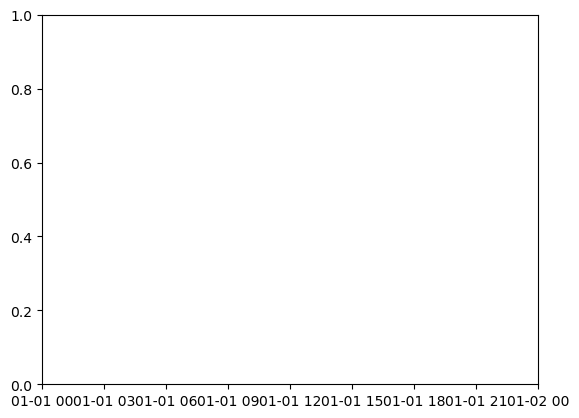

In [18]:
plt.plot(df['Date'], dataset_test.values, color='red', label='Real TESLA Stock Price')
plt.plot(df.loc['Date'], predicted_stock_price, color='blue', label='Predicted TESLA Stock Price')
#plt.xticks(np.arange(0, 459, 50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (583,) and (459,)

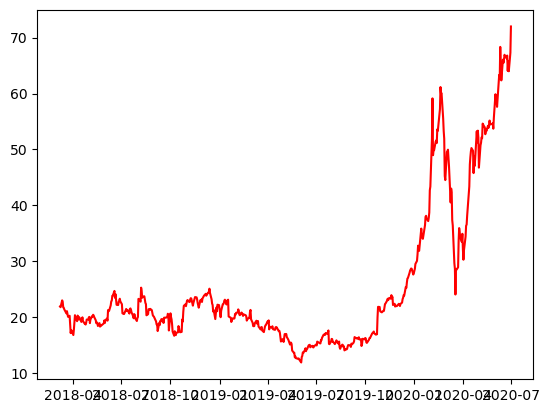

In [15]:
# Visualisierung der Ergebnisse
plt.plot(df.loc[800:, 'Date'], df.loc[800:, 'Close'], color='red', label='Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'], predicted_stock_price, color='blue', label='Predicted TESLA Stock Price')
plt.xticks(np.arange(800, len(df), 50), rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1383,) and (459,)

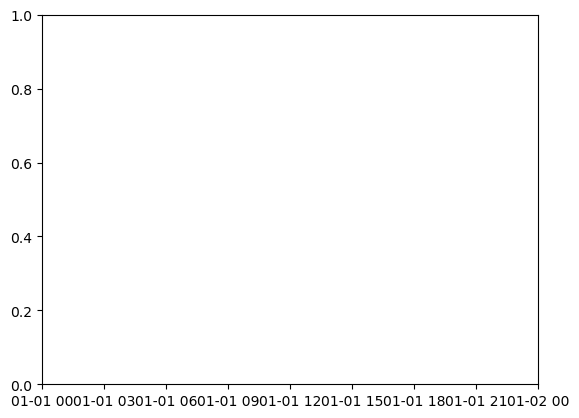

In [24]:
import matplotlib.pyplot as plt

#plt.plot(df.loc[800:, 'Date'], dataset_test.values)
plt.plot(df['Date'], predicted_stock_price)
plt.xticks(np.arange(0, 459, 50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

